# 4장. Matplotlib

## 4.1 그래프 그리기 기초

In [1]:
import matplotlib.pyplot as plt

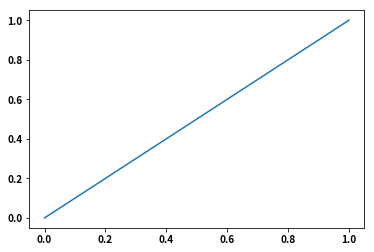

In [2]:
fig = plt.figure()
ax = fig.add_subplot(111)

dat = [0, 1]
ax.plot(dat)

plt.show()

### 피겨와 서브플롯
 - add_subplot()
 - subplots()

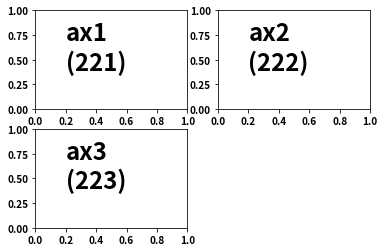

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

for i, ax in enumerate([ax1, ax2, ax3], start=1):
    txt = 'ax{0}\n(22{0})'.format(i)
    ax.text(0.2, 0.4, txt, fontsize=24)
plt.show()

<class 'numpy.ndarray'> [[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170562E9D30>


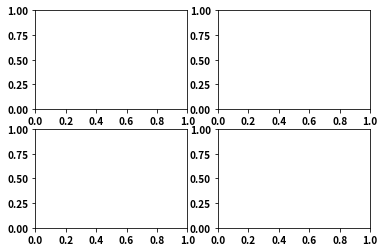

In [6]:
fig, axes = plt.subplots(2, 2)
print(type(axes), axes)

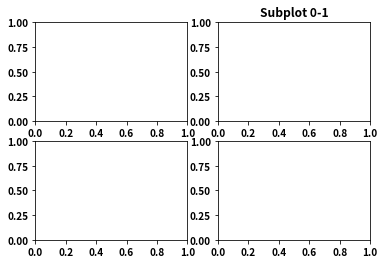

In [8]:
fig, axes = plt.subplots(2, 2)
axes[0, 1].set_title('Subplot 0-1')
plt.show()

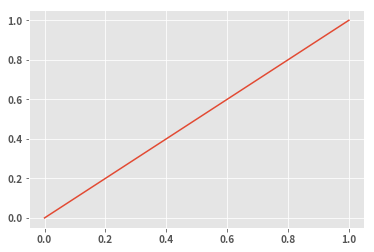

In [10]:
plt.style.use('ggplot')
fig = plt.figure()
ax = fig.add_subplot(111)
dat = [0, 1]
ax.plot(dat)

plt.show()

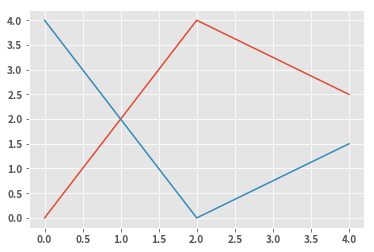

In [11]:
# 여러개의 선을 그릴때
fig = plt.figure()
ax = fig.add_subplot(111)

x = [0, 2, 4]
y1 = [0, 4, 2.5]
y2 = [4, 0, 1.5]

ax.plot(x, y1)
ax.plot(x, y2)

plt.show()

### 두 개의 축을 가진 그래프 그리기
 - twinx()
 - twiny()

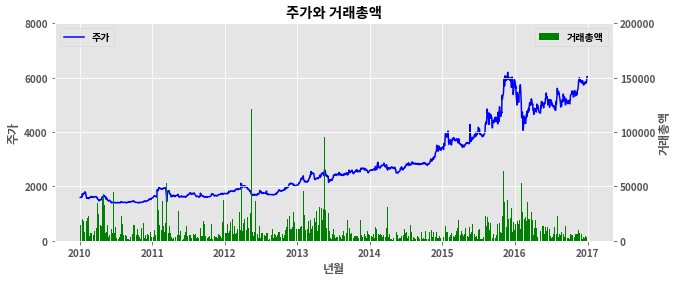

In [33]:
import os
import pandas as pd
base_url = 'https://raw.githubusercontent.com/practical-jupyter/sample-data/master/anime/'
t4816_csv = os.path.join(base_url, '4816.csv')
df = pd.read_csv(t4816_csv, index_col=0, parse_dates=['Date'])

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(111)

ax1.plot(df.index, df['Close'], color='b', label='주가')

ax2 = ax1.twinx()
ax2.bar(df.index, df['Volume'], color='g', label='거래총액', width=2)

ax1.set_yticks([i * 2000 for i in range(5)])
ax1.set_ylabel('주가')
ax2.set_yticks([i*50000 for i in range(5)])
ax2.set_ylabel('거래총액') 
ax1.set_xlabel('년월')

ax1.set_title('주가와 거래총액')

ax1.legend(loc=2)
ax2.legend(loc=1)

plt.show()

### 누적 히스토그램

In [16]:
anime_master_csv = os.path.join(base_url, "anime_master.csv")

df = pd.read_csv(anime_master_csv, index_col='anime_id')
df.head()

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama',"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


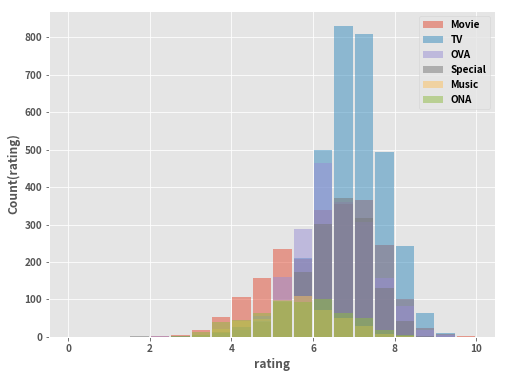

In [18]:
import numpy as np

types = df['type'].unique()
labels = types.tolist()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

b_num = np.arange(0, 10.5, 0.5)

for t in types:
    ax.hist(df.loc[df['type']==t, 'rating'],
           bins=b_num,
           rwidth=0.9,
           alpha=0.5,
           label=t)

ax.legend()
ax.set_xlabel('rating')
ax.set_ylabel('Count(rating)')

plt.show()

# 5장. matplotlib 활용 

## 5.1 색 지정

옵션|설명
-----|-----
color|오브젝트 색
facecolor|채우기 색
edgecolor|테두리선 색

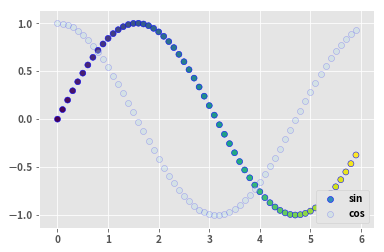

In [35]:
import matplotlib.pyplot
import numpy as np

x = np.arange(0, 6, 0.1)
y1 = np.sin(x)
y2 = np.cos(x)

fig = plt.figure()
ax=fig.add_subplot(111)

ax.scatter(x, y1, label='sin', c=x, edgecolor='blue')
ax.scatter(x, y2, label='cos', color='lightblue', edgecolor='blue', alpha=0.3)
ax.legend(framealpha=1, loc='lower right')
plt.show()

### 그래프 축과 눈금 설정

 - set_xlim(), set_ylim()
 - plt.subplots(... , sharex=True, sharey=True)
 - 로그축 설정: ax.set_xscale('log')

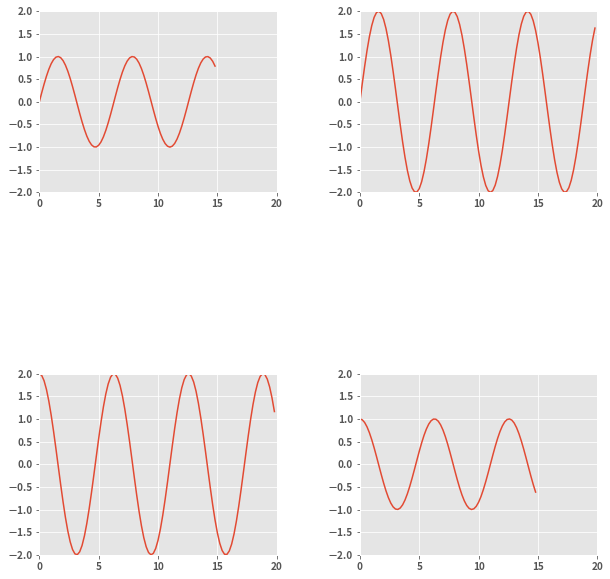

In [38]:
import matplotlib.pyplot as plt
import numpy as np

x1 = np.arange(0, 15, 0.2)
x2 = np.arange(0, 20, 0.2)

y1 = np.sin(x1)
y2 = np.sin(x2) * 2
y3 = np.cos(x2) * 2
y4 = np.cos(x1)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.plot(x1, y1, label='y1')
ax2.plot(x2, y2, label='y2')
ax3.plot(x2, y3, label='y3')
ax4.plot(x1, y4, label='y4')

axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.set_xlim(0, 20)
    ax.set_ylim(-2, 2)

# figure 안에서 padding 해줌.
fig.subplots_adjust(wspace=0.35, hspace=0.35)
plt.show()

### 파일 출력

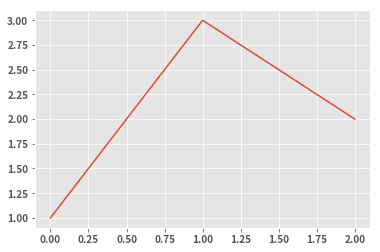

In [30]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
dat = [1, 3, 2]

ax.plot(dat)
fname = 'save_fig.png'
plt.savefig(fname)
plt.show()